In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
plt.rcdefaults()
sns.set_theme(style="whitegrid")

In [3]:
dataset = 'data/UpdatedResumeDataSet.csv'

In [4]:
df = pd.read_csv(dataset)

In [5]:
df.head()

,Category,Resume
0,Data Science,Skills * Programming Languages: Python (pandas...
1,Data Science,Education Details \r\nMay 2013 to May 2017 B.E...
2,Data Science,"Areas of Interest Deep Learning, Control Syste..."
3,Data Science,Skills â¢ R â¢ Python â¢ SAP HANA â¢ Table...
4,Data Science,"Education Details \r\n MCA YMCAUST, Faridab..."


In [6]:
df.shape

(962, 2)

In [7]:
distinct_category = df['Category'].unique()

In [8]:
distinct_category

array(['Data Science', 'HR', 'Advocate', 'Arts', 'Web Designing',
       'Mechanical Engineer', 'Sales', 'Health and fitness',
       'Civil Engineer', 'Java Developer', 'Business Analyst',
       'SAP Developer', 'Automation Testing', 'Electrical Engineering',
       'Operations Manager', 'Python Developer', 'DevOps Engineer',
       'Network Security Engineer', 'PMO', 'Database', 'Hadoop',
       'ETL Developer', 'DotNet Developer', 'Blockchain', 'Testing'],
      dtype=object)

In [9]:
df['Category'].value_counts()

Category
Java Developer               84
Testing                      70
DevOps Engineer              55
Python Developer             48
Web Designing                45
HR                           44
Hadoop                       42
Blockchain                   40
ETL Developer                40
Operations Manager           40
Data Science                 40
Sales                        40
Mechanical Engineer          40
Arts                         36
Database                     33
Electrical Engineering       30
Health and fitness           30
PMO                          30
Business Analyst             28
DotNet Developer             28
Automation Testing           26
Network Security Engineer    25
SAP Developer                24
Civil Engineer               24
Advocate                     20
Name: count, dtype: int64

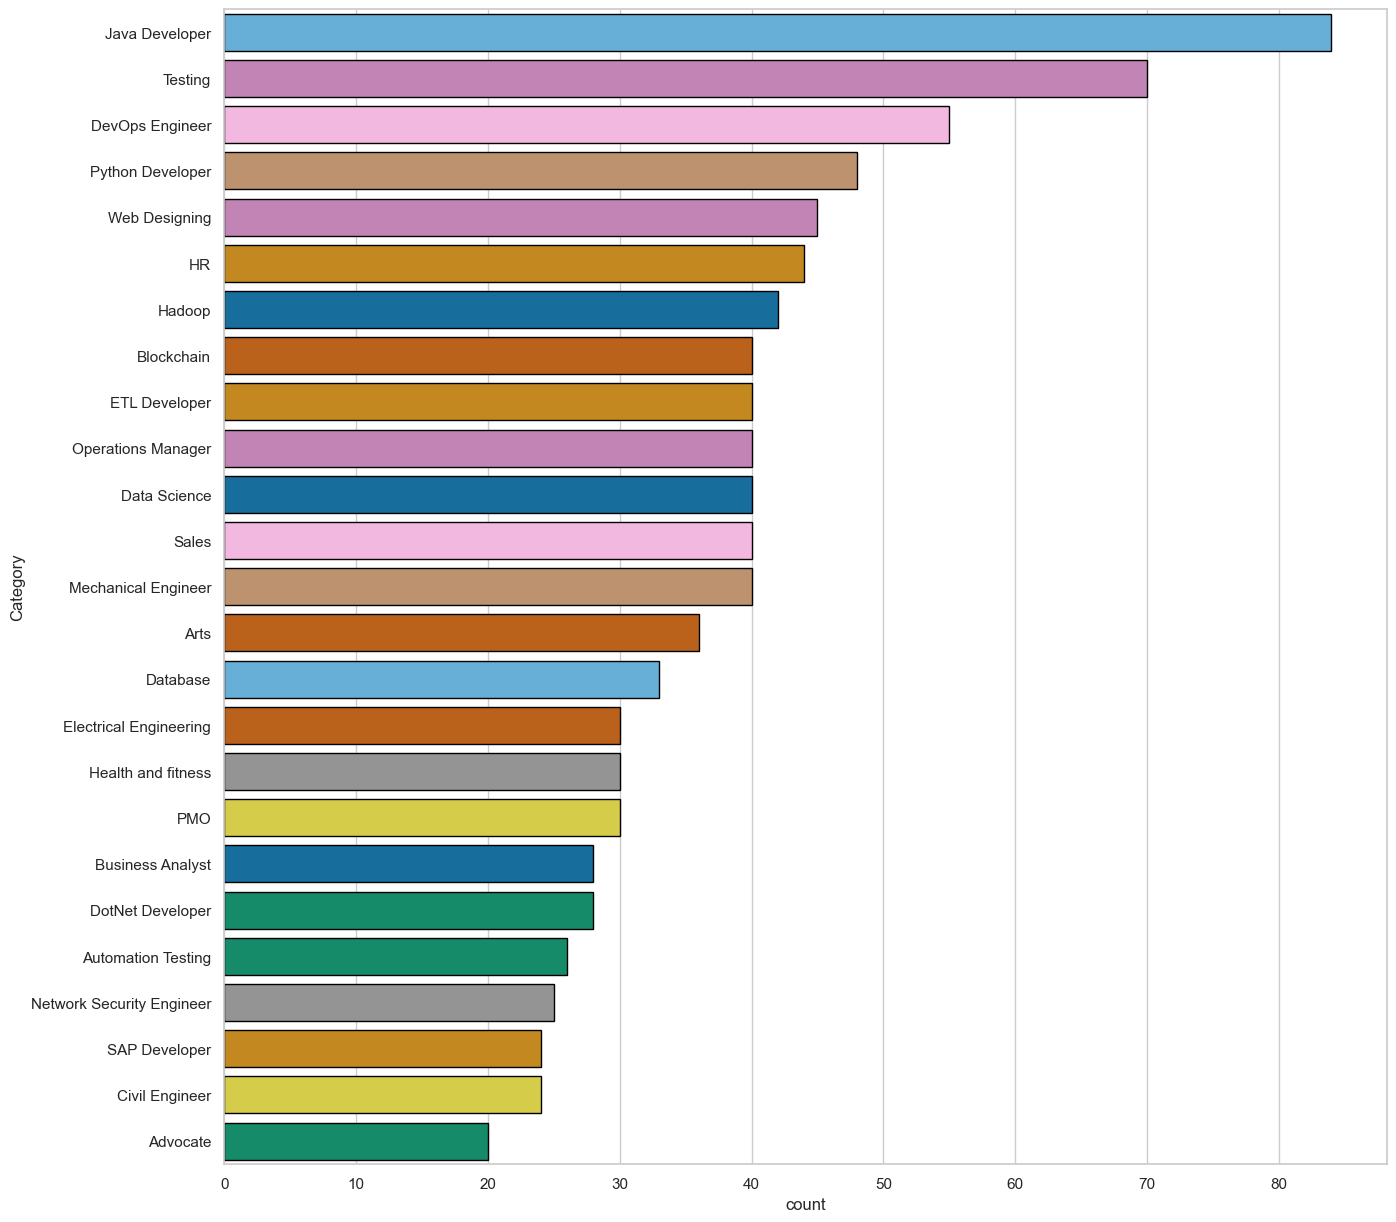

In [10]:
plt.figure(figsize=(15,15))
sns.countplot(data=df,y='Category',order=df['Category'].value_counts().index,
              hue='Category', palette="colorblind", edgecolor='black')
plt.show()

In [11]:
df['Category'][0]

'Data Science'

In [12]:
df['Resume'][0]

'Skills * Programming Languages: Python (pandas, numpy, scipy, scikit-learn, matplotlib), Sql, Java, JavaScript/JQuery. * Machine learning: Regression, SVM, NaÃ¯ve Bayes, KNN, Random Forest, Decision Trees, Boosting techniques, Cluster Analysis, Word Embedding, Sentiment Analysis, Natural Language processing, Dimensionality reduction, Topic Modelling (LDA, NMF), PCA & Neural Nets. * Database Visualizations: Mysql, SqlServer, Cassandra, Hbase, ElasticSearch D3.js, DC.js, Plotly, kibana, matplotlib, ggplot, Tableau. * Others: Regular Expression, HTML, CSS, Angular 6, Logstash, Kafka, Python Flask, Git, Docker, computer vision - Open CV and understanding of Deep learning.Education Details \r\n\r\nData Science Assurance Associate \r\n\r\nData Science Assurance Associate - Ernst & Young LLP\r\nSkill Details \r\nJAVASCRIPT- Exprience - 24 months\r\njQuery- Exprience - 24 months\r\nPython- Exprience - 24 monthsCompany Details \r\ncompany - Ernst & Young LLP\r\ndescription - Fraud Investigatio

In [17]:
import re

def clean_data(raw_txt: str) -> str:
    """
    Function to clean URL, Hashtags, @Mentions, Special Chars from text
    """
    clean_text = re.sub('http\S+\s', ' ', raw_txt)
    clean_text = re.sub('RT|cc', ' ', clean_text)
    clean_text = re.sub('#\S+\s', ' ', clean_text)
    clean_text = re.sub('@\S+', '  ', clean_text)  
    clean_text = re.sub('[%s]' % re.escape("""!"#$%&'()*+,-./:;<=>?@[\]^_`{|}~"""), ' ', clean_text)
    clean_text = re.sub(r'[^\x00-\x7f]', ' ', clean_text) 
    clean_text = re.sub('\s+', ' ', clean_text)   
    return clean_text

In [18]:
raw_txt = 'Education Details \r\n\r\nData Science Assurance Associate \r\n\r\nData Science Assurance Associate - Ernst & Young LLP\r\nSkill Details \r\nJAVASCRIPT- Exprience - 24 months\r\njQuery- Exprience - 24 months\r\nPython- Exprience - 24 monthsCompany Details \r\ncompany - Ernst & Young LLP\r\ndescription - Fraud Investigations and Dispute Services   Assurance\r\nTECHNOLOGY ASSISTED REVIEW\r\nTAR (Technology Assisted Review) assists in accelerating the review process and run analytics and generate reports.\r\n* '
clean_data(raw_txt)

'Education Details Data Science Assurance Associate Data Science Assurance Associate Ernst Young LLP Skill Details JAVASCRIPT Exprience 24 months jQuery Exprience 24 months Python Exprience 24 monthsCompany Details company Ernst Young LLP description Fraud Investigations and Dispute Services Assurance TECHNOLOGY ASSISTED REVIEW TAR Technology Assisted Review assists in a elerating the review process and run analytics and generate reports '

In [19]:
df['Resume'] = df['Resume'].apply(lambda x: clean_data(x))

In [20]:
df['Resume'][0]

'Skills Programming Languages Python pandas numpy scipy scikit learn matplotlib Sql Java JavaScript JQuery Machine learning Regression SVM Na ve Bayes KNN Random Forest Decision Trees Boosting techniques Cluster Analysis Word Embedding Sentiment Analysis Natural Language processing Dimensionality reduction Topic Modelling LDA NMF PCA Neural Nets Database Visualizations Mysql SqlServer Cassandra Hbase ElasticSearch D3 js DC js Plotly kibana matplotlib ggplot Tableau Others Regular Expression HTML CSS Angular 6 Logstash Kafka Python Flask Git Docker computer vision Open CV and understanding of Deep learning Education Details Data Science Assurance Associate Data Science Assurance Associate Ernst Young LLP Skill Details JAVASCRIPT Exprience 24 months jQuery Exprience 24 months Python Exprience 24 monthsCompany Details company Ernst Young LLP description Fraud Investigations and Dispute Services Assurance TECHNOLOGY ASSISTED REVIEW TAR Technology Assisted Review assists in a elerating the 

In [21]:
from sklearn.preprocessing import LabelEncoder

In [38]:
"""Encode target labels with value between 0 and n_classes-1."""
le = LabelEncoder()
le.fit(df['Category'])
df['Category'] = le.transform(df['Category'])

In [39]:
df.Category.nunique()

25

In [42]:
df.Category.unique()

array([ 6, 12,  0,  1, 24, 16, 22, 14,  5, 15,  4, 21,  2, 11, 18, 20,  8,
       17, 19,  7, 13, 10,  9,  3, 23], dtype=int64)

In [46]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [50]:
tfidf = TfidfVectorizer(stop_words="english")
tfidf.fit(df['Resume'])
required_text = tfidf.transform(df['Resume'])

In [53]:
required_text

<962x7351 sparse matrix of type '<class 'numpy.float64'>'
	with 164261 stored elements in Compressed Sparse Row format>

In [54]:
from sklearn.model_selection import train_test_split

In [55]:
x_train, x_test, y_train, y_test = train_test_split(required_text, df['Category'], test_size=0.2, random_state=42)

In [56]:
x_train.shape

(769, 7351)

In [57]:
x_test.shape

(193, 7351)

In [58]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.multiclass import OneVsRestClassifier
from sklearn.metrics import accuracy_score

In [62]:
clf = OneVsRestClassifier(KNeighborsClassifier())
clf.fit(x_train,y_train)
y_pred = clf.predict(x_test)
print(accuracy_score(y_test,y_pred))

0.9844559585492227


In [63]:
y_pred

array([15, 15, 15, 13, 14, 17, 16,  2,  0, 14, 13, 12, 16, 23, 20,  5,  6,
        4, 10,  9, 19,  1, 10, 23, 23, 21, 22, 22,  2, 12, 18,  1,  8, 24,
       11, 23,  7, 12, 24,  8, 18,  6,  8, 19, 24, 23, 21,  1, 15,  4, 15,
       22, 11,  5, 15, 13,  1, 19,  5, 12, 22, 22, 20, 24, 21, 18, 12, 10,
       10, 20, 10,  8,  9, 21, 17, 21,  0, 17, 16, 14, 15, 11, 11,  8, 20,
        3, 19,  8,  0,  2,  9, 10,  2, 23, 20, 20, 23, 12, 18, 12,  7, 16,
        8, 14, 18,  3, 14, 19, 14, 14, 15, 18,  8,  2, 21, 18, 23, 10, 23,
        5, 11, 15, 12,  3,  5,  3,  7, 12, 19,  8, 20, 19,  3, 15,  9, 19,
        1, 23, 21,  5, 20, 15, 16,  7,  7,  8, 15, 18,  1, 15, 13, 20,  7,
        4, 18, 11,  5, 15,  5, 12,  9, 22, 18, 21,  8, 23,  4, 12, 24, 16,
       15, 22,  8, 22,  3, 16, 23, 23, 12,  7, 16, 18,  5,  3, 18,  8, 23,
       23, 20, 21,  6,  7, 23], dtype=int64)

In [66]:
import pickle
pickle.dump(tfidf, open('tfidf.pkl','wb'))
pickle.dump(clf, open('clf.pkl','wb'))

In [67]:
my_resume = """
Bishal Rana Magar
+977-9860330722 bishalmagr70@gmail.com www.ranamagarbishal.com.np
Summary
Always hardworking and motivated.
Organized and dependable candidate
successful at managing multiple priorities
with a positive attitude. Willingness to take
on added responsibilities to meet team
goals.
Verbal Communication
Teamwork
Soft Skills
Adaptability
Critical Thinking
Git
Oracle Data Integrator
Jira
Softwares
Trello
VS Code
Tableau
Work History
Languages
English
Nepali
Software Engineer
Software Engineer
Cotiviti Nepal, Hattisar, Kathmandu, Nepal
Software Engineer Intern
KurmaTech, Budanilkhantha, Kathmandu, Nepal
Participated in reviewing project specifications and designed technology
solutions that met or exceeded performance expectations.
Collaborated with team to define solution requirements.
Jul 2021 - Dec 2021
Spearheaded the design and implementation of innovative Extract, Transform, Load
(ETL) pipelines, to ensure optimal data processing efficiency.
Played active role in the ongoing maintenance of existing ETL pipelines,
implementing proactive measures to enhance performance, scalability, and
adaptability to changing data requirements.
Diagnosed and rectified complex bugs within the ETL pipeline, significantly
contributing to the delivery of high-quality products to clients within specified
timelines
Introduced and implemented a series of innovative ideas to optimize and
automate existing workflows, resulting in substantial time and resource savings.
Earned trust within the team and organization by consistently delivering highquality solutions and demonstrating a strong commitment to the success of team
projects.
Executed comprehensive data validation processes on the data warehouse,
ensuring the accuracy and reliability of stored data.
Nov 2022 - Feb 2024
Software Engineer
Infinite Software Services Nepal Pvt Ltd, Hattisar, Kathmandu, Nepal
Design and implementation of innovative Extract, Transform, Load (ETL) pipelines,
to ensure optimal data processing efficiency.
Maintenance of existing ETL pipelines, implementing proactive measures to
enhance performance, scalability, and adaptability to changing data requirements.
Diagnoses and fixing of complex bugs within the ETL pipeline, significantly
contributing to the delivery of high-quality products to clients within specified
timelines
Automated existing workflows in pipeline
"""

In [74]:
clf = pickle.load(open('clf.pkl','rb'))

cleaned_resume = clean_data(my_resume)

input_features = tfidf.transform([cleaned_resume])

prediction_id = clf.predict(input_features)[0]

# Map category ID to category name
category_mapping = {
    15: "Java Developer",
    23: "Testing",
    8: "DevOps Engineer",
    20: "Python Developer",
    24: "Web Designing",
    12: "HR",
    13: "Hadoop",
    3: "Blockchain",
    10: "ETL Developer",
    18: "Operations Manager",
    6: "Data Science",
    22: "Sales",
    16: "Mechanical Engineer",
    1: "Arts",
    7: "Database",
    11: "Electrical Engineering",
    14: "Health and fitness",
    19: "PMO",
    4: "Business Analyst",
    9: "DotNet Developer",
    2: "Automation Testing",
    17: "Network Security Engineer",
    21: "SAP Developer",
    5: "Civil Engineer",
    0: "Advocate",
}

category_name = category_mapping.get(prediction_id, "Unknown")

print("Predicted Category:", category_name)
print(prediction_id)

Predicted Category: ETL Developer
10
